<h3>Libraries</h3>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sn

In [ ]:
obj = pd.Series([-7, -5, 7, 4, 2, 0, 4])

In [ ]:
obj

In [ ]:
obj.rank(
    method="dense",
)

In [ ]:
obj.rank(method="first")

In [ ]:
frame = pd.DataFrame(
    {"b":[4.3, 7, -3, 2],
     "a":[0, 1, 0, 1],
     "c":[-2, 5, 8, -2.5]}
)

In [ ]:
frame

In [ ]:
frame.rank(axis="columns",
           method="max",
           
          )

In [ ]:
obj = pd.Series(np.arange(5),
                index=['a', 'a', 'b', 'b', 'c'])

In [ ]:
obj

In [ ]:
obj.index.is_unique

In [ ]:
df = pd.DataFrame(np.random.standard_normal((5, 3)),
                  index=['a', 'a', 'b', 'b', 'c'])

In [ ]:
df

In [ ]:
df.loc["a"]

In [ ]:
df.loc["c"]

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])

In [ ]:
df

In [ ]:
df.sum(axis=0)

In [ ]:
df.sum(axis="index",
       # skipna=False,
      )

In [ ]:
df.sum(axis=1,
       # skipna=False,
      )

In [ ]:
df.idxmax()

In [ ]:
df.describe().loc['mean']

In [ ]:
# non-numeric data
obj = pd.Series(['a', 'a', 'b', 'c']*4)

In [ ]:
obj.describe()

In [ ]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [ ]:
obj.unique()

In [ ]:
pd.Series(obj).value_counts()

In [ ]:
data = pd.DataFrame({"qu1": [1, 3, 4, 3, 4],
                     "qu2": [2, 3, 1, 2, 3],
                     "qu3": [1, 5, 2, 4, 4]})

In [ ]:
data.qu1.value_counts().sort_index()

In [ ]:
data.value_counts()

In [ ]:
import sys

In [ ]:
data.to_csv(sys.stdout, index=False, columns=['qu1', 'qu3'], sep="|")

In [ ]:
import sqlite3

In [ ]:
query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20), c REAL, d INTEGER);"""

In [ ]:
con = sqlite3.connect("mydata.sqlite")
con.execute(query)
con.commit()

In [ ]:
data = [("Atlanta", "Georgia", 1.25, 6),
        ("Tallahassee", "Florida", 2.6, 3),
        ("Sacramento", "California", 1.7, 5)]

In [ ]:
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

In [ ]:
cursor = con.execute("SELECT * FROM test")
rows = cursor.fetchall()

In [ ]:
rows

In [ ]:
cursor.description

In [ ]:
df = pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

In [ ]:
df

In [ ]:
import sqlalchemy as sqla

In [ ]:
db = sqla.create_engine("sqlite:///mydata.sqlite")

In [ ]:
df = pd.read_sql("SELECT * FROM test", db)

In [ ]:
df

In [ ]:
# drop duplicates
data = pd.DataFrame({"k1": ["one", "two"]*3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 4, 4]})

In [ ]:
data

In [ ]:
# data.duplicated()

In [ ]:
# data = data.drop_duplicates()

In [ ]:
# data

In [ ]:
data.loc[:,'v1'] = range(7)

In [ ]:
data

In [ ]:
data.drop_duplicates(subset=['k2'])

In [ ]:
data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon", "pastrami", "corned beef", "bacon", "pastrami", "honey ham", "nova lox"],
                     "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [ ]:
data

In [ ]:
meat_to_animal = {
    "bacon": "pig",
    "pulled pork": "pig",
    "pastrami": "cow",
    "corned beef": "cow",
    "honey ham": "pig",
    "nova lox" : "Salmon"
}

In [ ]:
data['animal'] = data["food"].map(meat_to_animal)

In [ ]:
data

In [ ]:
data = pd.Series([1., -999., 2.0, -999.0, -1000, -1000, 3])

In [ ]:
data

In [ ]:
data.replace([-999, -1000], np.nan)

In [ ]:
data.replace([-999, -1000], [np.nan, 0])

In [ ]:
data.replace({-999: np.nan, -1000: 0})

In [ ]:
data

In [ ]:
# binning and discretization
ages = [18, 22, 25, 26, 21, 23, 37, 31, 61, 45, 41, 32]

In [ ]:
bins = [18, 25, 35, 60, 100]
# bins = 5

In [ ]:
age_categories = pd.cut(ages, bins)

In [ ]:
age_categories

In [ ]:
ages

In [ ]:
df = pd.DataFrame([[1, 2.12], [3.356, 4.567]])

In [ ]:
df

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.iloc[0,0] = pd.NA

In [ ]:
df_copy

In [ ]:
df_copy.map(lambda x: len(str(x)), na_action=None)

In [ ]:
df

In [ ]:
df.map(round, ndigits=1)

In [ ]:
data = pd.DataFrame(np.arange(12).reshape(3, 4),
                    index=['Computer Engineering', 'Civil Engineering', 'Electrical Engineering'],
                    columns=['Year One', 'Year Two', 'Year Three', 'Year Four']
                   )

In [ ]:
data

In [ ]:
def transform(x):
    return x[:4].upper()

In [ ]:
data.index = data.index.map(transform)

In [ ]:
data

In [ ]:
data = data.rename(index=str.title,
                   columns=str.upper,
                  )

In [ ]:
data

In [ ]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,
      right=False,
      )

In [ ]:
# Binning with qcut
data = np.random.standard_normal(1000)
quartiles = pd.qcut(data, 4, precision=2)

In [ ]:
quartiles

In [ ]:
data = pd.DataFrame(np.random.standard_normal((1000, 4)))

In [ ]:
data.describe()

In [ ]:
# Getting outliers where value is greater than three in any column
data[(data.abs() > 3).any(axis="columns")] 

In [ ]:
# Capping the outlier values to 3
data[data.abs() > 3] = np.sign(data) * 3

In [ ]:
data[(data.abs() == 3).any(axis="columns")]

In [ ]:
# Permutations
df = pd.DataFrame(np.arange(5*7).reshape((5, 7)))

In [ ]:
df

In [ ]:
sampler = np.random.permutation(5)

In [ ]:
sampler

In [ ]:
# Sampling
df.take(sampler)

In [ ]:
df = pd.DataFrame({"key": ['b', 'b', 'a', 'c', 'a', 'b'],
                   "data1": range(6)})

In [ ]:
df

In [ ]:
pd.get_dummies(df["key"])

In [ ]:
s = pd.Series(list('abca'))

In [ ]:
s

In [ ]:
pd.get_dummies(s)

In [ ]:
s1 = ['a', 'b', np.nan]

In [ ]:
pd.get_dummies(s1)

In [ ]:
pd.get_dummies(s1,
               dummy_na=True,
              prefix="key",
              prefix_sep = "-",
              )

In [ ]:
s1 = pd.Series(["a|b", "a", "a|c"])

In [ ]:
s1

In [ ]:
s1.str.get_dummies()

In [ ]:
s = pd.Series([1, 2, 3, None], dtype=pd.Int64Dtype())

In [ ]:
s

In [ ]:
s.isna()

In [ ]:
s.dtype

In [ ]:
s[3]

In [ ]:
s[3] is pd.NA

In [ ]:
s = pd.Series(["one", "two", None, "three'"], dtype=pd.StringDtype())

In [ ]:
s

In [ ]:
df = pd.DataFrame({"A": [1, 2, None, 4],
                   "B": ["one", "two", "three", None],
                   "C": [False, None, False, True]})

In [ ]:
df

In [ ]:
df['A'] = df['A'].astype("Int64")
df['B'] = df['B'].astype("string")
df["C"] = df["C"].astype("boolean")

In [ ]:
df

In [ ]:
import re

In [ ]:
text = "foo bar\t baz \tqux"

In [ ]:
re.split(r"\s+", text)

In [ ]:
regex = re.compile(r"\s+")

In [ ]:
regex.split(text)

In [ ]:
regex.findall(text)

In [ ]:
pattern = r"[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}"

In [ ]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
steven.kakaire@mak.ac.ug
Ryan ryan@yahoo.com"""

In [ ]:
text

In [ ]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
regex.findall(text)

In [ ]:
print

In [ ]:
m = regex.search(text)

In [ ]:
m

In [ ]:
m.start()

In [ ]:
m.end()

In [ ]:
text[m.start():m.end()]

In [ ]:
indexPattern = r'U+[0-9]+/[0-9]+'

In [ ]:
regexIndex = re.compile(indexPattern, flags=re.IGNORECASE)

In [ ]:
regexIndex.match('U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)')[0]

In [ ]:
student = 'U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)'

In [ ]:
pd.Series(student.split()).str.contains('M')

In [ ]:
namePattern = r'([A-Z]+){2,10}'

In [ ]:
regexName = re.compile(namePattern, flags=re.IGNORECASE)

In [ ]:
regexName.findall(student)

In [ ]:
student = 'U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)'

In [ ]:
# regex.match('U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)')[0]

In [ ]:
pattern = r"\b[a-zA-Z\\]+"

In [ ]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
m = re.match(pattern, student)

In [ ]:
m

In [ ]:
yearPattern = r"\b[0-9]{4}"

In [ ]:
regex = re.compile(yearPattern)

In [ ]:
regex.findall(student)

In [ ]:
student

In [ ]:
# print(regex.sub("REDACTED", text))

In [ ]:
# pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9._]+)\.([A-Z]{2,4})"

In [ ]:
# regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
# m = regex.match("wesm@right.net")

In [ ]:
# m.groups()

In [ ]:
# kakaire = regex.match("steven.kakaire@mak.ac.ug")

In [ ]:
# kakaire.groups()

In [ ]:
# regex.findall(text)

In [ ]:
# raw string needs not to be written on multiple lines.
# print(regex.sub(r"Username: \1, Domain: \2, Suffix: \3",
#                 text))

In [ ]:
# print(regex.sub(r"Username: \1, Domain: \2, Suffix: \3", text))

<h1>STRING MANIPULATION</h1>
<p>Real world data is messy and requires a lot of string manipulation.</p>

In [ ]:
import re
import pandas as pd
import numpy as np

In [ ]:
data = {"Hawa Jamal": "hawa.jamal@gmail.com",
        "King Kakaire": "steven.kakaire@mak.ac.ug",
        "Nalubega Daisy Mercy": "daisy.nalubega@yahoo.com",
        "rashidah Naluwongo": np.nan
       }

In [ ]:
data = pd.Series(data)

In [ ]:
data

In [ ]:
data.str.contains("com")

In [ ]:
s1 = pd.Series(['Mouse', 'dog', 'house and parrot', '23', np.nan])

In [ ]:
s1.str.contains('og', regex=False)

In [ ]:
s1.loc[s1.str.contains('house | parrot', na=False)]

In [ ]:
# Specifying na to be True
s1.str.contains('og', na=False, regex=True)

In [ ]:
# ignoring sensitivity
s1.str.contains('PARROT', flags=re.IGNORECASE, regex=True)

In [ ]:
s2 = pd.Series(['40', '40.0', '41', '41.0', '35'])

In [ ]:
s2.str.contains('.0', regex=True)

In [ ]:
s2.str.contains('//d', regex=True)

In [ ]:
data

In [ ]:
data_as_string_ext = data.astype('string')

In [ ]:
data_as_string_ext

In [ ]:
data_as_string_ext.str.contains("mak")

In [ ]:
pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})"

In [ ]:
data.str.findall(pattern, flags=re.IGNORECASE)

In [ ]:
data.str.findall(pattern, flags=re.IGNORECASE).iloc[0]

In [ ]:
matches = data.str.findall(pattern, flags=re.IGNORECASE).str[0]

In [ ]:
matches.str.get(1)

In [ ]:
data.str.extract(pattern, flags=re.IGNORECASE)

<h1>Categoriacal Data</h1>

In [ ]:
values = pd.Series(['apple', 'orange', 'apple','apple']*2)

In [ ]:
values

In [ ]:
pd.unique(values)

In [ ]:
values = pd.Series([0, 1, 0, 0, 0]*2)

In [ ]:
values

In [ ]:
dim = pd.Series(['apple', 'orange'])

In [ ]:
dim.take(values)

In [ ]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2

In [ ]:
N = len(fruits)

In [ ]:
fruits

In [ ]:
rng = np.random.default_rng(seed=1234)

In [ ]:
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': rng.integers(3, 15, N),
                   'weight': rng.uniform(0, 4, size=N)},
                  columns=['basket_id', 'fruit', 'count', 'weight'])

In [ ]:
df

In [ ]:
df['fruit']

In [ ]:
fruit_cat = df['fruit'].astype('category')

In [ ]:
fruit_cat

In [ ]:
c = fruit_cat.array

In [ ]:
c

In [ ]:
type(c)

In [ ]:
c.categories

In [ ]:
c.codes

<h3>Enumerate</h3>

In [ ]:
colleges = ['Engineering', 'Natural Sciences', 'Health Sciences', 'Humanities', 'Business Management', 'Veterinary', 'Agriculture']

In [ ]:
colleges

In [ ]:
list(enumerate(colleges))

In [ ]:
for index, college in enumerate(colleges):
    print(index, college)

In [ ]:
dict(enumerate(c.categories))

In [ ]:
categories = ['CEDAT', 'CONAS', 'CHS']

In [ ]:
codes = [0, 1, 2, 0, 0, 1]

In [ ]:
my_cats = pd.Categorical.from_codes(codes, categories)

In [ ]:
my_cats

In [ ]:
ordered_cat = pd.Categorical.from_codes(codes, categories, ordered=True)

In [ ]:
ordered_cat

In [ ]:
my_cats.as_ordered()

In [ ]:
draws = rng.standard_normal(1000)

In [ ]:
draws[:5]

In [ ]:
bins = pd.qcut(draws, 4)

In [ ]:
bins

In [ ]:
# Using labels
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [ ]:
bins

In [ ]:
bins = pd.Series(bins, name='quartile')

In [ ]:
bins

<h3>Descriptive Statistics</h3>

In [ ]:
result = (pd.Series(draws).groupby(bins, observed=True).agg(['count', 'min', 'max']).reset_index())

In [ ]:
result

In [ ]:
# Advantages of categorical data
N = 10_000_000
labels = pd.Series(['foo', 'bar', 'baz', 'qux']*(N//4))

In [ ]:
labels

In [ ]:
categories = labels.astype('category')

In [ ]:
categories

In [ ]:
labels.memory_usage(deep=True)

In [ ]:
categories.memory_usage(deep=True)

In [ ]:
# Labels use more memory than categories

In [ ]:
%time _ = labels.astype('category')

In [ ]:
%timeit labels.value_counts()

In [ ]:
%timeit categories.value_counts()

In [ ]:
# categories take a significantly shorter time than labels

<h3>Categorical methods</h3>

In [ ]:
s = pd.Series(['a', 'b', 'c', 'd']*2)

In [ ]:
cat_s = s.astype('category')

In [ ]:
cat_s

In [ ]:
cat_s.cat.codes

In [ ]:
cat_s.cat.categories

In [ ]:
# setting categories
actual_categories = ['a', 'b', 'c', 'd', 'e']

In [ ]:
# set categories beyond the observed categories in data
cat_s2 = cat_s.cat.set_categories(actual_categories)

In [ ]:
cat_s2

In [ ]:
cat_s.value_counts()

In [ ]:
cat_s2.value_counts()

In [ ]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]

In [ ]:
cat_s3

In [ ]:
# Removing unused categories
cat_s3.cat.remove_unused_categories()

In [ ]:
# dummy variables
cat_s = pd.Series(['a', 'b', 'c', 'd']*2, dtype='category')

In [ ]:
cat_s

In [ ]:
pd.get_dummies(cat_s)

<h1>Data Wrangling: Join, Combine, and Reshape</h1>

In [ ]:
data = pd.Series(np.random.uniform(size=9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])

In [ ]:
data

In [ ]:
data.index

In [ ]:
data['b']

In [ ]:
data['a':'b']

In [ ]:
data[['a', 'd']]

In [ ]:
data.loc[:, 3]

In [ ]:
data.unstack()

In [ ]:
data

In [ ]:
data.unstack()

In [ ]:
# Reversing the stack operation
data.unstack().stack()

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'c'],
                            [1, 2, 1, 2]],
                     columns=[["Kampala", "Iganga", "Iganga"],
                              ["Green", "Orange", "Orange"]])

In [ ]:
frame

In [ ]:
frame.index.names = ["key 1", "key 2"]

In [ ]:
frame.columns.names = ["City", "Color"]

In [ ]:
frame

In [ ]:
# number of the frame index level
frame.index.nlevels

In [ ]:
# number of frame column level
frame.columns.nlevels

In [ ]:
frame['Iganga']

In [ ]:
frame.swaplevel("key 1", "key 2")

In [ ]:
frame.swaplevel(0, 1).sort_index(level=0)

In [ ]:
frame.groupby(level="key 2").sum()

In [ ]:
frame.T.groupby(level="Color").sum()

In [ ]:
frame = pd.DataFrame({"a": range(7),
                      "b": range(7, 0, -1),
                      "c": ["one", "one", "one", "two", "two", "two", "two"],
                      "d": [0, 1, 2, 0, 1, 2, 3]})

In [ ]:
frame

In [ ]:
frame2 = frame.set_index(["c", "d"])

In [ ]:
frame2

In [ ]:
frame = frame.set_index(['c', 'd'],
                # drop=False,
               # append=True,
               )

In [ ]:
frame.reset_index(
                inplace=True
                 )

In [ ]:
frame

<h3>Combining and Merging Data</h3>

In [ ]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "a", "b"],
                    "data1": pd.Series(range(7), dtype="Int64")})

In [ ]:
df2 = pd.DataFrame({"key": ["a", "b", "d"],
                    "data2": pd.Series(range(3),
                                             dtype="Int64")})                    

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.merge(df1, df2,
         on="key",
         how="right"
        )

In [ ]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
                    "data1": pd.Series(range(6), dtype="Int64")})

In [ ]:
df2 = pd.DataFrame({"key": ['a', 'b', 'a', 'b', 'd'],
                    "data2": pd.Series(range(5),
                                       dtype="Int64")})

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.merge(df1, df2, on="key", how="left")

<h3>Merging on Index</h3>

In [ ]:
left1 = pd.DataFrame({"key": ['a', 'b', 'a', 'a', 'b', 'c'],
                      "value": pd.Series(range(6), dtype='Int64')})

In [ ]:
left1

In [ ]:
right1 = pd.DataFrame({"group_val": [3.5, 7]}, index=["a", "b"])

In [ ]:
right1

In [ ]:
pd.merge(left1, right1, left_on="key",
         right_index=True,
        )

In [ ]:
# Merging on multilevel indexes
lefth = pd.DataFrame({"key1": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada"],
                      "key2": [2000, 2001, 2002, 2001, 2002],
                      "data": pd.Series(range(5), dtype="Int64")})

In [ ]:
lefth

In [ ]:
righth_index = pd.MultiIndex.from_arrays([["Nevada", "Nevada", "Ohio", "Ohio", "Ohio", "Ohio"],
                                        [2001, 2000, 2000, 2001, 2001, 2002]])

In [ ]:
righth_index

In [ ]:
righth = pd.DataFrame({"event1": pd.Series([0, 2, 4, 6, 8, 10], dtype="Int64", index=righth_index),
                       "event2": pd.Series([1, 3, 5, 7, 9, 11], dtype="Int64",
                       index=righth_index)
                      })

In [ ]:
righth

In [ ]:
pd.merge(lefth, righth, left_on=["key1", "key2"],
         right_index=True)

In [ ]:
pd.merge(lefth, righth, left_on=["key1", "key2"],
         right_index=True,
        how="outer")

In [ ]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=["a", "c", "e"],
                     columns=["Ohio", "Nevada"]).astype("Int64")

In [ ]:
left2

In [ ]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13., 14.]],
                      index=["b", "c", "d", "e"],
                      columns=["Missouri", "Alabama"]
                     ).astype("Int64")

In [ ]:
right2

In [ ]:
pd.merge(left2, right2,
         how="outer",
         left_index=True,
         right_index=True,
        )

In [ ]:
# Join
left2.join(right2, how="outer")

In [ ]:
left1

In [ ]:
right1

In [ ]:
left1.join(right1, on="key")

In [ ]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])

In [ ]:
another

In [ ]:
left2.join([right2, another])

In [ ]:
left2.join([right2, another],
           how="outer")

<h3>Concatenation</h3>

In [ ]:
arr = np.arange(12).reshape((3, 4))

In [ ]:
arr

In [ ]:
np.concatenate([arr, arr], axis=1)

In [ ]:
s1 = pd.Series([0, 1], index=['a', 'b'], dtype="Int64")

In [ ]:
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'], dtype="Int64")

In [ ]:
s3 = pd.Series([5, 6], index=["f", "g"], dtype="Int64")

In [ ]:
s1

In [ ]:
s2

In [ ]:
s3

In [ ]:
pd.concat([s1, s2, s3])

In [ ]:
# Concatenating along the columns
pd.concat([s1, s1, s3], axis=1)

In [ ]:
pd.concat([s1, s2, s3], axis="columns")

In [ ]:
s4 = pd.concat([s1, s3], axis="columns", join="inner")

In [ ]:
s4

In [ ]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [ ]:
result

In [ ]:
result.unstack()

In [ ]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2),
                   index=['a', 'b', 'c'],
                   columns=['one', 'two'])

In [ ]:
df1

In [ ]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2,2), index=['a', 'c'],
                   columns=['three', 'four'])

In [ ]:
df2

In [ ]:
pd.concat([df1, df2], 
          axis="columns", 
          keys=["level1", "level2"],
         # join="inner",
          # ignore_index=True,
         )

In [ ]:
pd.concat({"level1": df1,
           "level2": df2},
          axis="columns",
         join="inner")

In [ ]:
pd.concat([df1, df2],
          axis="columns",
          keys=["level1", "level2"],
          names=["upper", "lower"])

In [ ]:
df1 = pd.DataFrame(np.random.standard_normal((3, 4)),
                   columns=['a', 'b', 'c', 'd'])

In [ ]:
df2 = pd.DataFrame(np.random.standard_normal((2, 3)),
                   columns=['b', 'd', 'a'])

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.concat([df1, df2],
         ignore_index=True,
         )

In [ ]:
# overlap
a = pd.Series([np.nan, 2.5, 0.0, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])

In [ ]:
b = pd.Series([0., np.nan, 2., np.nan, np.nan, 5],
              index=['a', 'b', 'c', 'd', 'e', 'f'])

In [ ]:
a

In [ ]:
b

In [ ]:
# if an element in a is not a number, replce with b's
np.where(pd.isna(a), b, a)

In [ ]:
pd.isna(a)

In [ ]:
a.combine_first(b)

In [ ]:
df1 = pd.DataFrame({"a":[1., np.nan, 5., np.nan],
                    "b":[np.nan, 2., np.nan, 6.],
                    "c":range(2, 18, 4)})

In [ ]:
df1

In [ ]:
df2 = pd.DataFrame({"a":[5., 4., np.nan, 3., 7.],
                    "b":[np.nan, 3., 4., 6., 8.]})

In [ ]:
df2

In [ ]:
# Replace a with non-null value of b if null or else maintain.
df1.combine_first(df2)

<h3>Reshaping and Pivoting</h3>

In [ ]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Iganga', 'Jinja'], name="City"),
                    columns = pd.Index(["One", "two", "three"],
                                       name="number"))

In [ ]:
data

In [ ]:
result = data.stack()

In [ ]:
result

In [ ]:
# By default, the inner level is unstacked, 
result.unstack(level=0)

In [ ]:
result.unstack(level="City")

In [ ]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'],
               dtype='int64')

In [ ]:
s1

In [ ]:
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'],
               dtype='Int64')

In [ ]:
s2

In [ ]:
data = pd.concat([s1, s2], keys=['one', 'two'])

In [ ]:
data

In [ ]:
df = pd.DataFrame({"left": result, "right": result + 5},
                  columns = pd.Index(["left", "right"],
                                     name="side"))

In [ ]:
df

In [ ]:
# The level unstacked become the lowest in the result
df.unstack(level="City")

In [ ]:
# load csv data
data = pd.read_csv('../Data/macrodata.csv')

In [ ]:
data

In [ ]:
data = data.loc[:, ['year', 'quarter', 'realgdp', 'infl', 'unemp']]

In [ ]:
data

In [ ]:
periods = pd.PeriodIndex.from_fields(year=data.pop("year"),
                         quarter=data.pop("quarter"),
                         # name="date"
                                    )

In [ ]:
periods

In [ ]:
data

In [ ]:
data.index = periods.to_timestamp("D")

In [ ]:
data

In [ ]:
data = data.reindex(columns=['realgdp', 'infl', 'unemp'])

In [ ]:
data.columns.name = 'item'

In [ ]:
data

In [ ]:
long_data = (data.stack().reset_index().rename(columns={0:"value"}))

In [ ]:
long_data

In [ ]:
# Pivoting
pivoted = long_data.pivot(index='level_0',
                          columns='item',
                          values="value")

In [ ]:
pivoted

In [ ]:
long_data.head()

In [ ]:
long_data.set_index(["level_0", "item"]).unstack(level='item')

In [ ]:
pivoted = long_data.pivot(index='level_0',
                          columns='item',
                          values='value')

In [ ]:
pivoted

In [ ]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

In [ ]:
df

In [ ]:
df.pivot(index='foo',
         columns='bar',
         values='baz')

In [ ]:
df.pivot(index='foo',
         columns='bar',
        )['baz']

In [ ]:
df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])

In [ ]:
df = pd.DataFrame({
    "lev1": [1, 1, 1, 2, 2, 2],
    "lev2": [1, 1, 2, 1, 1, 2],
    "lev3": [1, 2, 1, 2, 1, 2],
    "lev4": [1, 2, 3, 4, 5, 6],
    "values": [0, 1, 2, 3, 4, 5]
})

In [ ]:
df

In [ ]:
df.pivot(index="lev1",
         columns=["lev2", "lev3"],
         values="values"
        )

In [ ]:
# Using melt

df = pd.DataFrame({
    "key": ["foo", "bar", "baz"],
    "A": [1, 2, 3],
    "B": [4, 5, 6],
    "C": [7, 8, 9]
})

In [ ]:
df

In [ ]:
melted = pd.melt(df, id_vars="key")

In [ ]:
melted

In [ ]:
reshaped = melted.pivot(index="key",
             columns="variable",
             values="value")

In [ ]:
reshaped

In [ ]:
# Moving data back into the column
reshaped.reset_index()

In [ ]:
# Selecting a subset of columns
pd.melt(df, id_vars="key",
        value_vars=['A', 'B'])

In [ ]:
# Without using group identifiers
pd.melt(df, value_vars=["A", "B"])

In [ ]:
# Including key under value_vars
pd.melt(df, value_vars=["key", "A", "B"])

<h1>Visualization</h1>
<p>Visualization using matplotlib, Seaborn</p>

In [89]:
%matplotlib inline

In [90]:
data = np.arange(10)

In [91]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

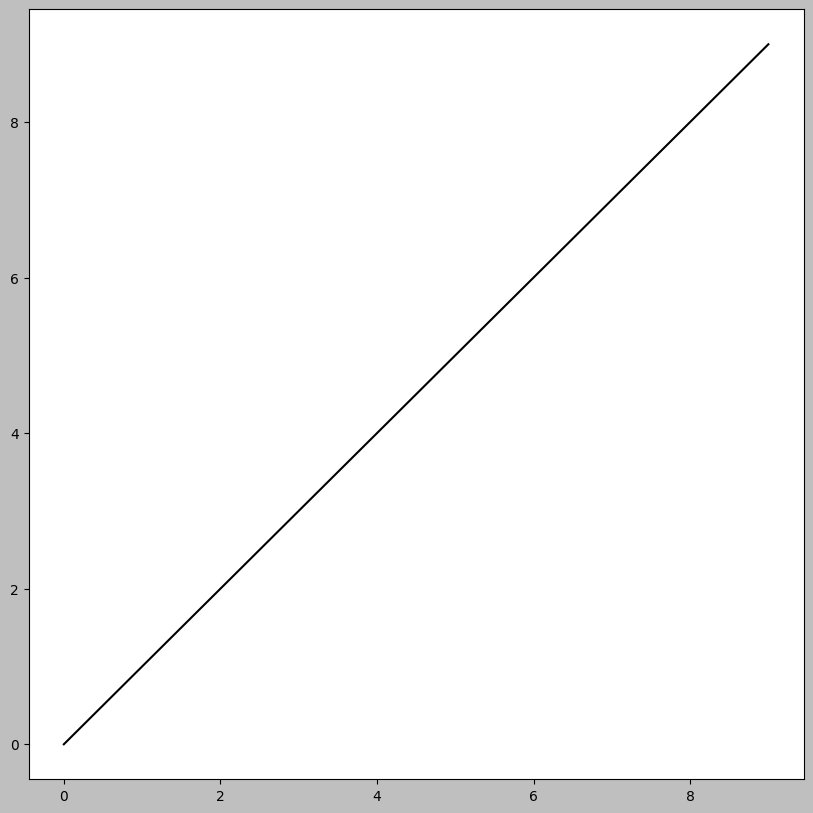

In [92]:
plt.plot(data)

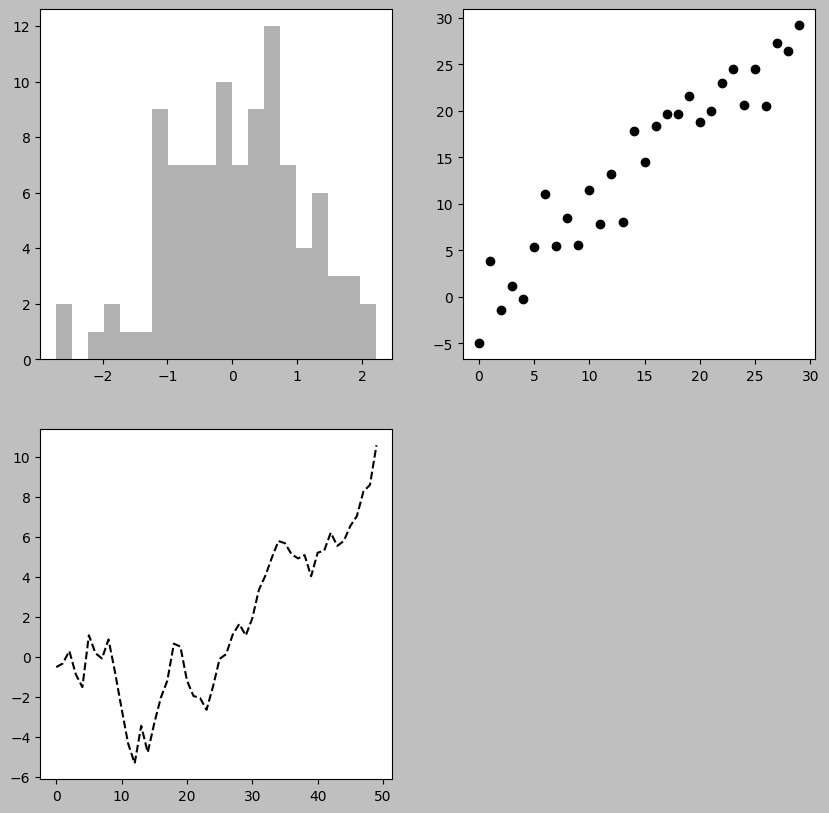

In [93]:
# Creating a figure object
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# Plots
ax3.plot(np.random.standard_normal(50).cumsum(),
         color="black",
        linestyle="dashed");
# ';' used to supress the output about the object added to the plot
ax1.hist(np.random.standard_normal(100),
         bins=20,
         color="black",
         alpha=0.3);
ax2.scatter(np.arange(30),
            np.arange(30) + 3*np.random.standard_normal(30));

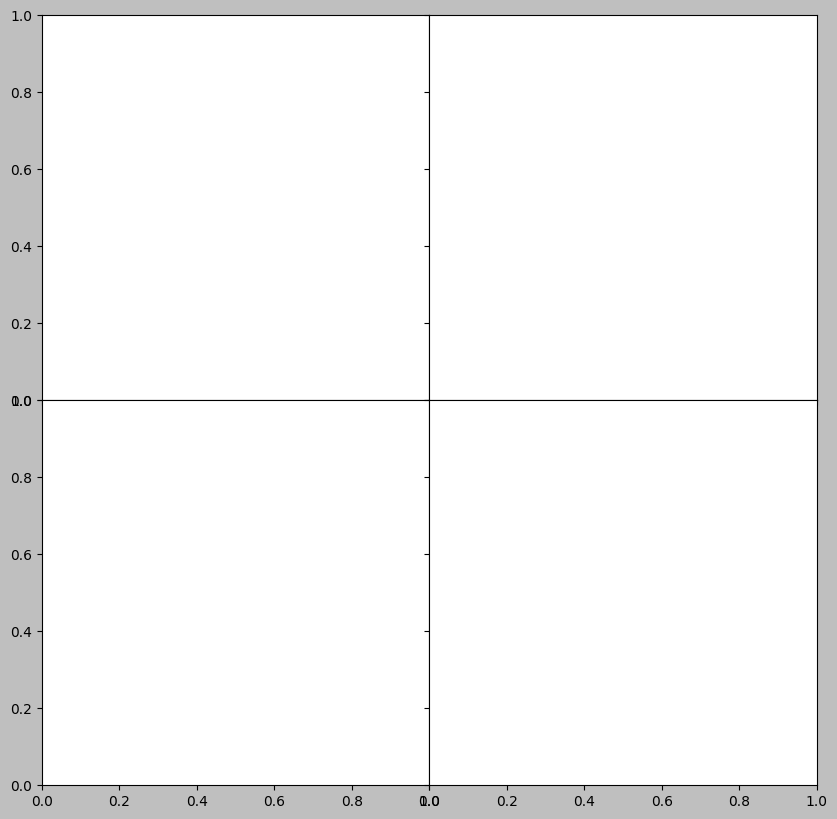

In [94]:
fig, axes = plt.subplots(2, 2,
                        sharex=True,
                        sharey=True)
fig.subplots_adjust(left=None,
                    bottom=None,
                    right=None,
                    top=None,
                    wspace=0,
                    hspace=0)

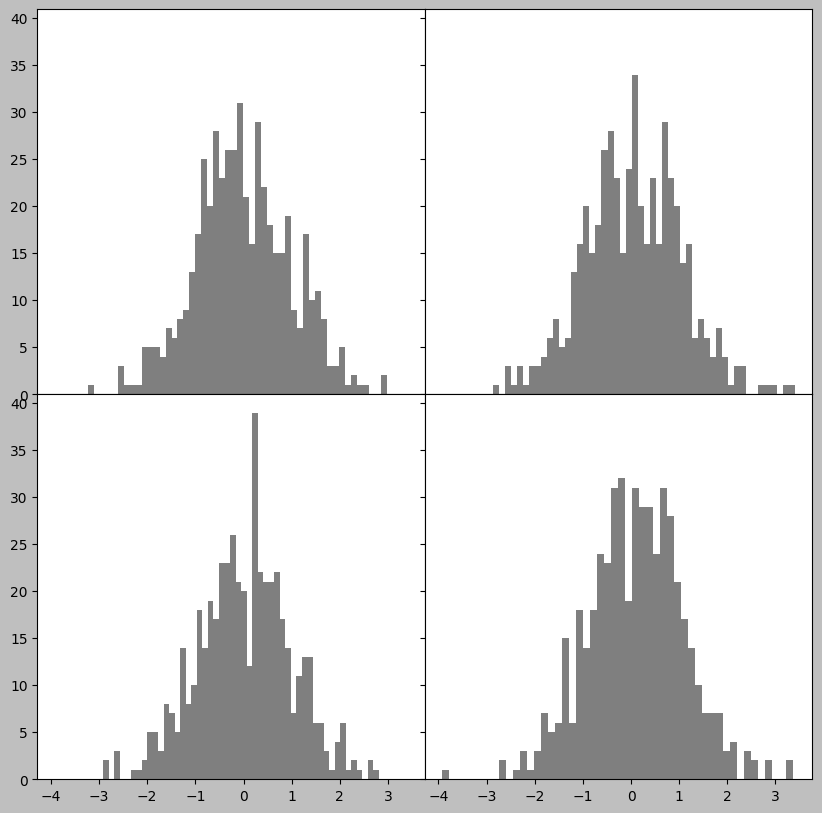

In [95]:
# adjusting wspace, hspace
fig, axes = plt.subplots(2, 2, sharex=True,
                         sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500),
                        bins=50,
                        color='black',
                        alpha=0.5)
fig.subplots_adjust(wspace=0,
                    hspace=0)

In [96]:
# supported
plt.plot?

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie

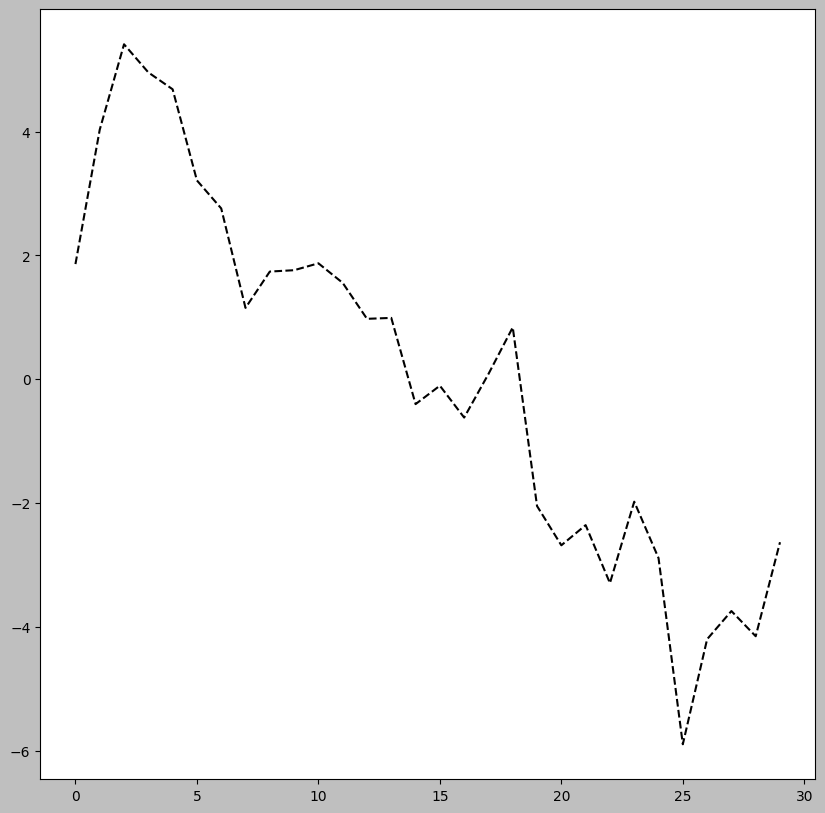

In [97]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(),
        color="black",
        linestyle="dashed",
        # marker="0"
       );

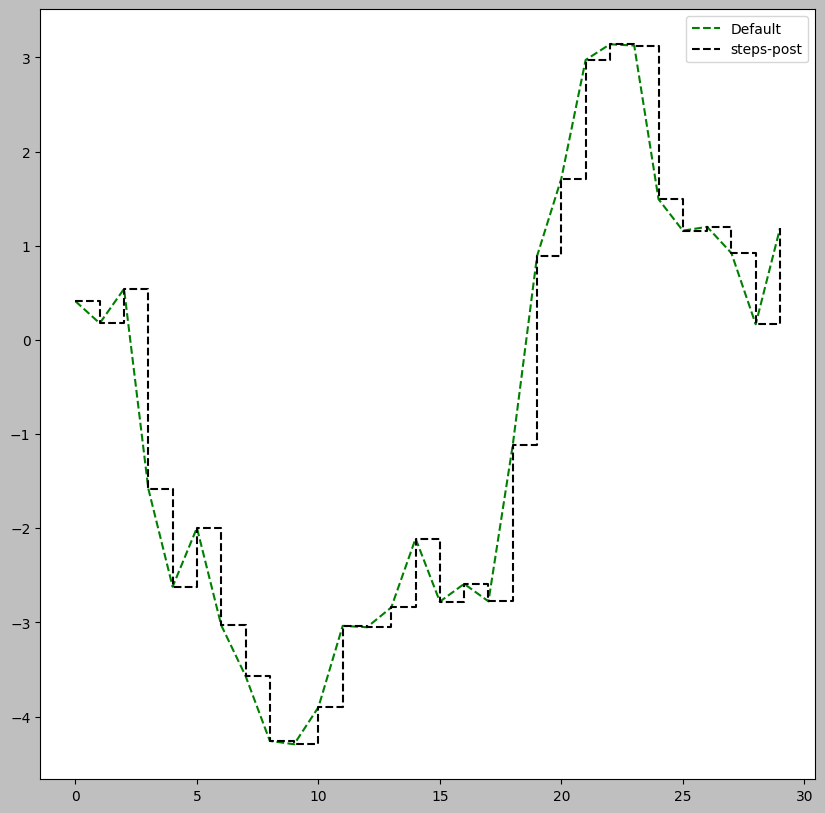

In [98]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data,
        color='green',
        linestyle='dashed',
        label='Default',
       );
ax.plot(data, color='black',
        linestyle='dashed',
        drawstyle='steps-post',
        label="steps-post",
       );
ax.legend();

<h3>Ticks, Labels and Legends</h3>

In [99]:
# Getting and settig xlim, ylim of the active or current subplot
ax.get_xlim()
ax.get_ylim()

(-4.666305570113497, 3.511106999775257)

Text(0.5, 1.0, 'This plot')

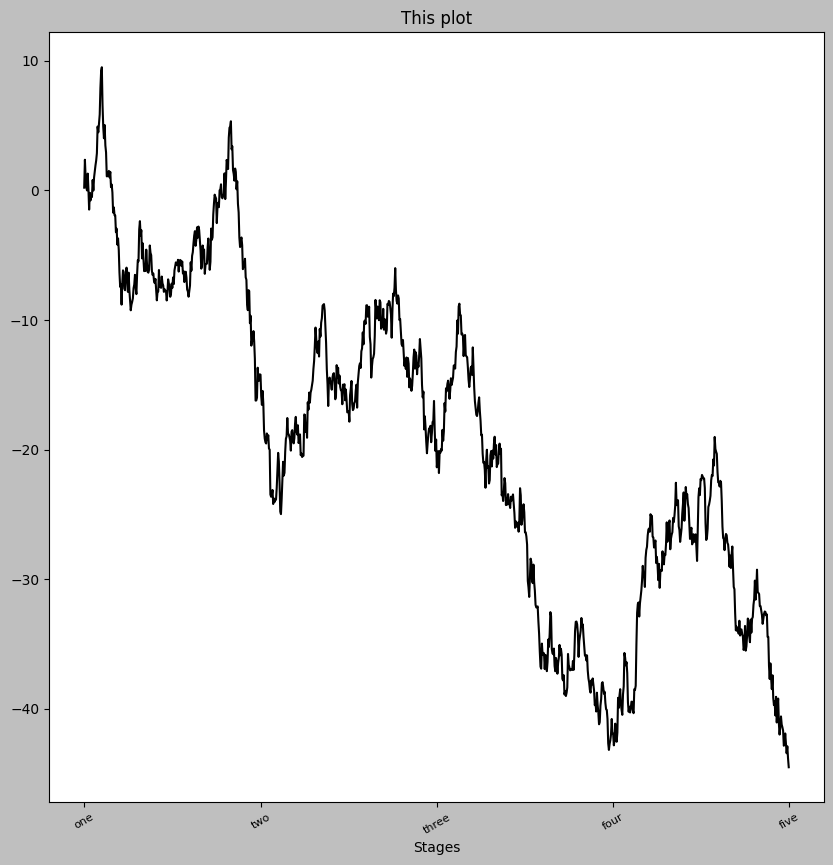

In [100]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1_000).cumsum());
ticks = ax.set_xticks([0, 250, 500, 750, 1_000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30,
                           fontsize=8,

                           )
# label the x-axis
ax.set_xlabel("Stages")

# plot title
ax.set_title("This plot")

<h3>Legends</h3>
<p>Legends aid to identify the different plots on a graph</p>

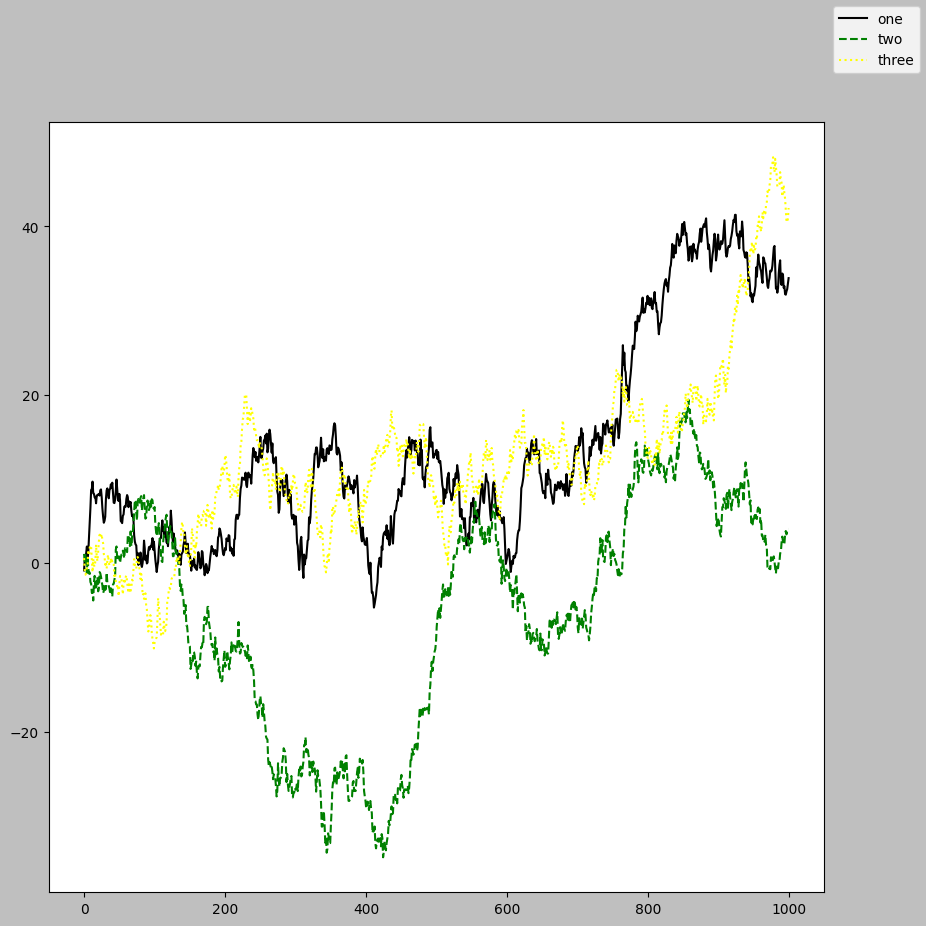

In [101]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1_000).cumsum(),
       color="black",
       label="one");
ax.plot(np.random.randn(1_000).cumsum(),
        color="green",
        linestyle="dashed",
        label="two"
       );
ax.plot(np.random.randn(1_000).cumsum(),
        color='yellow',
        linestyle='dotted',
        label="three");
fig.legend()

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

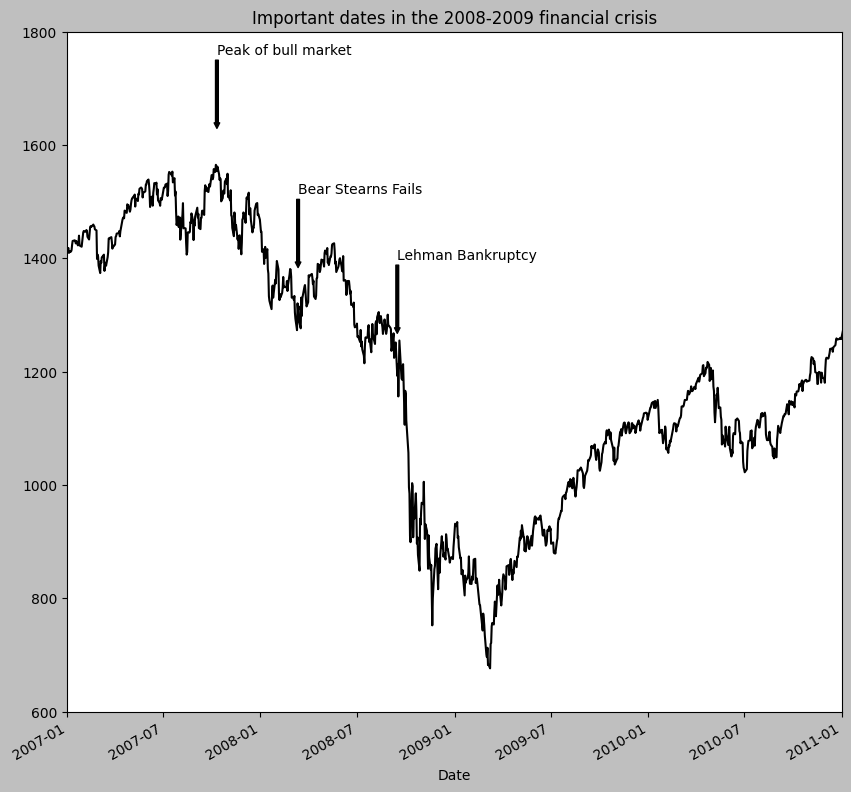

In [102]:
from datetime import datetime
fig, ax = plt.subplots()
data = pd.read_csv("../Data/spx.csv", index_col=0,
                   parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, color='black')
crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext = (date, spx.asof(date) + 225),
                          arrowprops=dict(facecolor='black',
                                          headwidth=4,
                                          width=2,
                                          headlength=4),
    horizontalalignment='left',
    verticalalignment='top')
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title("Important dates in the 2008-2009 financial crisis")

<h3>Shapes</h3>

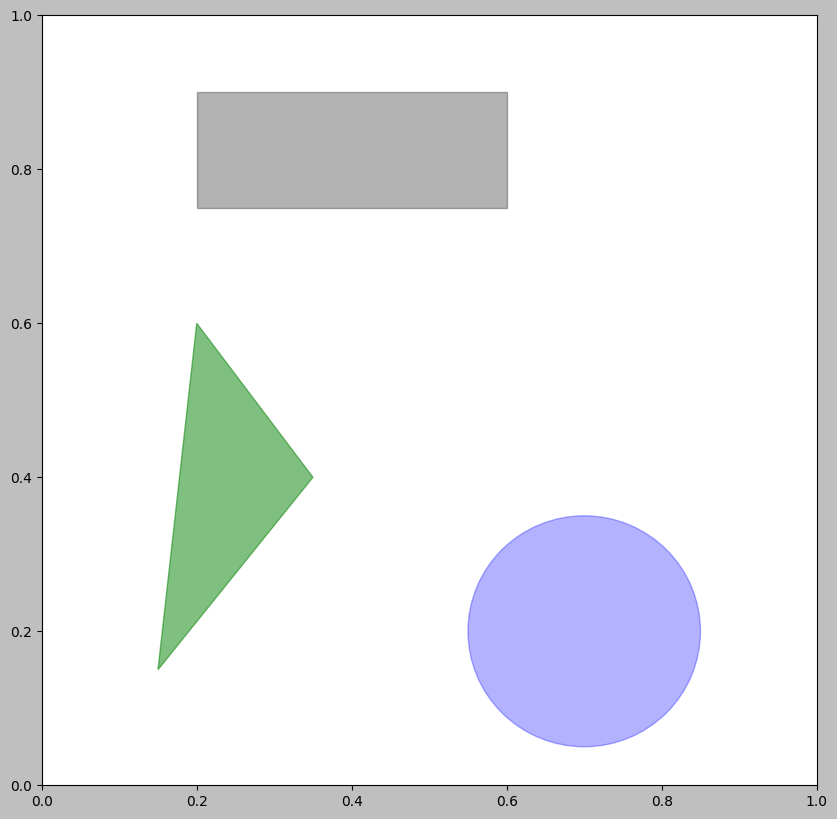

In [103]:
fig, ax = plt.subplots()
rect = plt.Rectangle((0.2, 0.75),
                     0.4, 0.15,
                     color="black",
                     alpha=0.3)
circ = plt.Circle((0.7, 0.2),
                  0.15,
                  color="blue",
                  alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15],
                    [0.35, 0.4],
                    [0.2, 0.6]],
                   color="green",
                   alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [104]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [105]:
plt.rc("figure", figsize=(10, 10))

In [106]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

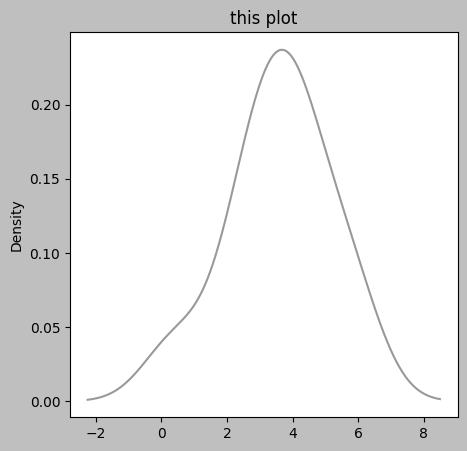

In [107]:
# Line Plots
# plt.rc("figure", figsize=(10, 10))
s = pd.Series(np.random.standard_normal(10).cumsum(),
              index=np.arange(0, 100, 10))
s.plot(
    figsize=(5, 5),
    alpha=0.4,
    label="this graph",
    # style="ko-",
    kind="kde",
    # logx=True,
    title="this plot",
    use_index=True,
);

In [108]:
# Plotting dataframe
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

In [109]:
df

,A,B,C,D
0,-0.850961,0.364057,0.273068,-0.513304
10,-2.385565,1.125792,-0.105762,1.242283
20,-1.966970,0.405743,2.071240,2.089642
30,-2.375868,0.290295,1.068496,2.046212
40,-1.223484,0.294387,1.952246,0.292488
50,-0.855488,0.329054,0.104298,-0.096474
60,0.027474,0.717167,-1.086501,0.426635
70,0.083295,1.733923,-1.221288,-0.162878
80,-0.323876,2.814180,-2.244782,0.401492
90,-1.637987,1.908864,-1.966884,0.080148


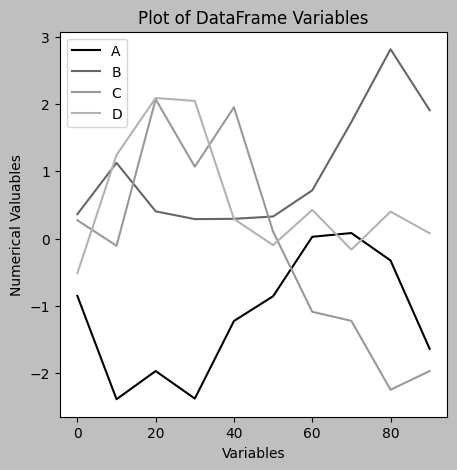

In [110]:
# plt.style.use('grayscale')
df.plot(figsize=(5, 5),
        title="Plot of DataFrame Variables",
        xlabel="Variables",
        ylabel="Numerical Valuables",
       );

In [111]:
# A Graduation DataFrame
grad = pd.DataFrame({"Graduates": [500, 631, 750, 893, 503, 819],
                     "First Classes": [30, 43, 81, 100, 210, 84],
                    },
                    index = ["CEDAT", "CoNAS", "CHS", "CEES", "CoBAMS", "CoVABS"],
                   )

In [112]:
grad

,Graduates,First Classes
CEDAT,500,30
CoNAS,631,43
CHS,750,81
CEES,893,100
CoBAMS,503,210
CoVABS,819,84


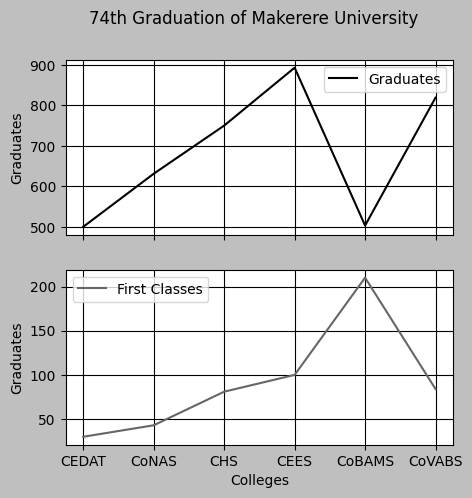

In [113]:
grad.plot(
    figsize=(5, 5),
    title="74th Graduation of Makerere University",
    xlabel="Colleges",
    ylabel="Graduates",
    grid=True,
    subplots=True,
);

<h3>Bar Plots</h3>
<p>pandas.plot.bar() and pandas.plot.barh() plot vertical and horizontal bars respectively.</p>

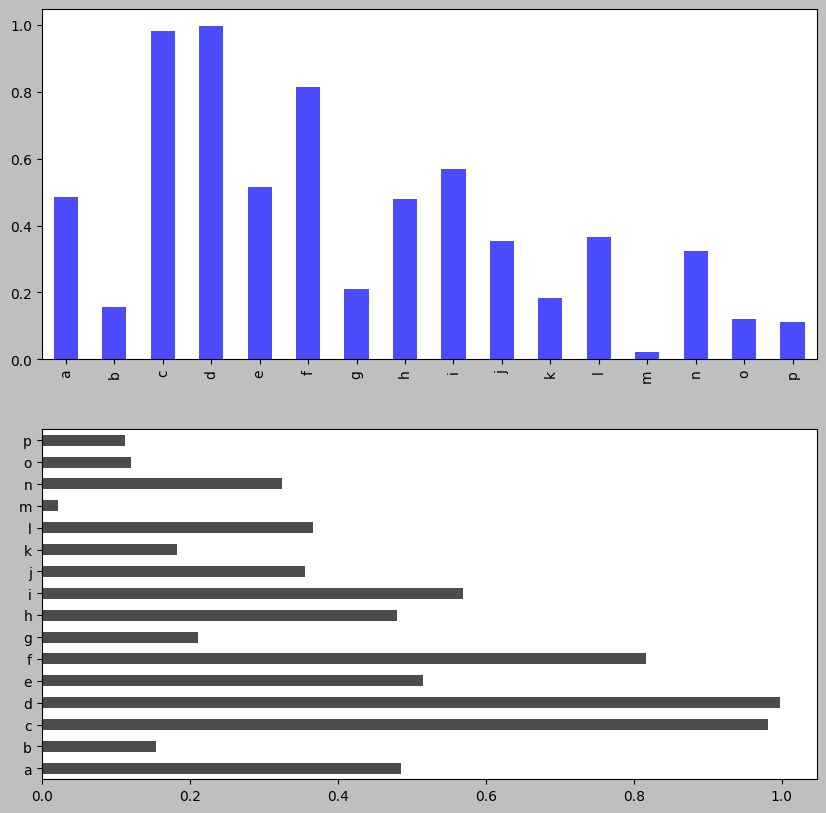

In [114]:
fig, axes = plt.subplots(2, 1)
# plt.style.use('grayscale');
data = pd.Series(np.random.uniform(size=16),
                 index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0],
              color="blue",
              alpha=0.7,
             );
data.plot.barh(ax=axes[1],
               color="black",
               alpha=0.7,
              );

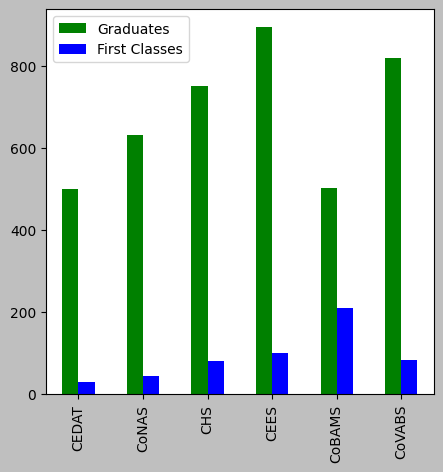

In [115]:
# Plotting grauation bar graphs
grad.plot.bar(
    figsize=(5,5),
    color=["Green", "Blue"],
);

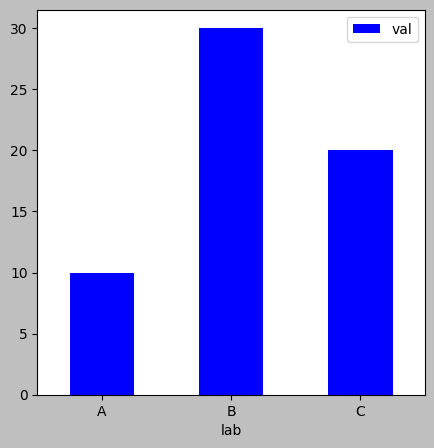

In [283]:
# More examples
df = pd.DataFrame({'lab': ['A', 'B', 'C'],
                   'val': [10, 30, 20]})
ax = df.plot.bar(x='lab',
                 y='val',
                 rot=0,
                figsize=(5, 5),
                 color="blue",
                );

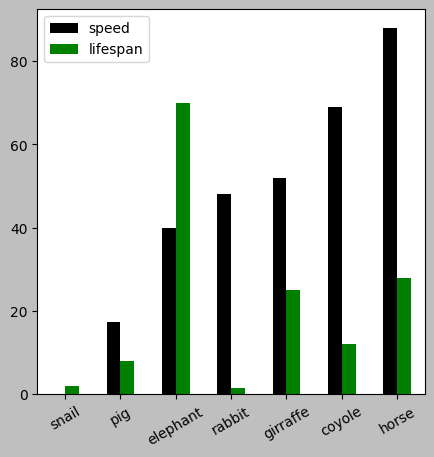

In [303]:
# TO-DO: Change background color to white
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant', 'rabbit', 'girraffe', 'coyole', 'horse']
df = pd.DataFrame({"speed": speed,
                   "lifespan": lifespan},
                   index=index,
                 )
# A bar plot
df.plot.bar(figsize=(5,5),
            color=['black', 'green'],
    rot=30);

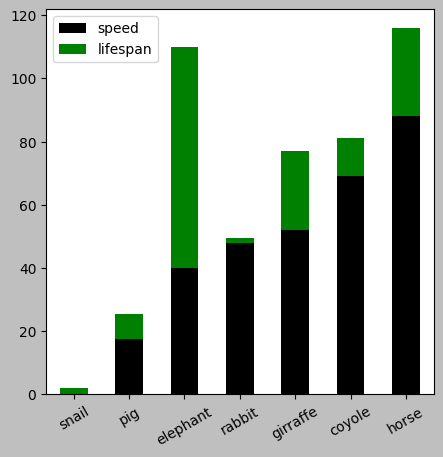

In [296]:
df.plot.bar(figsize=(5,5),
            color=['black', 'green'],
            stacked=True,
    rot=30);

<h3>Coffee Price Trends</h3>

<ul>
    <li>Preprocessing</li>
    <li>Visualization</li>
    <li>Time Series</li>
    <li>Trending analysis</li>
</ul>

In [272]:
# Read excel
coffeePriceTrends = pd.read_excel("../Data/Coffee/Price_Trend_1992_93_2015_USD.xls")

dfcolumns = coffeePriceTrends.columns
dfcolumns[0]
# coffeePriceTrends
coffeePriceTrends = coffeePriceTrends.drop([dfcolumns[0], columns[-1]], axis=1).dropna(how="any")
# Get column names
newColumns = coffeePriceTrends.iloc[0, :].tolist()

# print("newColumns: ")
# print(newColumns)
# print("\n")

coffeePriceTrends = coffeePriceTrends.drop(3, )
# print(coffeePriceTrends.columns)

dictPrice = {coffeePriceTrends.columns[x]: newColumns[x] for x in range(len(newColumns))}
# print(dictPrice)
coffeePriceTrends = coffeePriceTrends.rename(dictPrice,
                                            axis=1,
                                            )
coffeePriceTrends = coffeePriceTrends.set_index('MONTH')

# Create a multiIndex
index = pd.MultiIndex.from_arrays([["UGX", "UGX", "UGX", "EX.RATE", "USD", "USD", "USD"], ["ROBUSTA KIBOKO", "ROBUSTA FAQ", "ARABICA PARCHMENT", "EX.RATE Sh/Kg", "ROBUSTA KIBOKO", "ROBUSTA FAQ", "ARABICA PARCHMENT"]])


coffeePriceTrends.columns = index

# coffeePriceTrends

In [252]:
coffeePriceTrendsUGX = coffeePriceTrends['UGX']

In [273]:
coffeePriceTrends

UGX                                \
                    ROBUSTA KIBOKO ROBUSTA FAQ ARABICA PARCHMENT   
MONTH                                                              
1992-07-01 00:00:00            210         420               499   
1992-08-01 00:00:00            220         440               500   
1992-09-01 00:00:00            215         400               502   
1992-10-01 00:00:00            225         450               510   
1992-11-01 00:00:00            250         500               550   
...                            ...         ...               ...   
2015-05-01 00:00:00           2200        4320              5600   
2015-06-01 00:00:00           2250        4500              5750   
2015-07-01 00:00:00           2200        4350              5850   
2015-08-01 00:00:00           2200        4500              6250   
2015-09-01 00:00:00           2150        4250              5750   

                          EX.RATE            USD                                
                    EX.RATE Sh/Kg ROBUSTA KIBOKO ROBUSTA FAQ ARABICA PARCHMENT  
MONTH                                                                           
1992-07-01 00:00:00       1177.86       0.178289    0.356579           0.42365  
1992-08-01 00:00:00       1185.29       0.185609    0.371217          0.421838  
1992-09-01 00:00:00       1185.15       0.181412     0.33751          0.423575  
1992-10-01 00:00:00       1181.07       0.190505     0.38101          0.431812  
1992-11-01 00:00:00       1196.34       0.208971    0.417941          0.459736  
...                           ...            ...         ...               ...  
2015-05-01 00:00:00        3007.6        0.73148    1.436361           1.86195  
2015-06-01 00:00:00        3199.9       0.703147    1.406294          1.796931  
2015-07-01 00:00:00       3360.09       0.654744    1.294608          1.741025  
2015-08-01 00:00:00       3548.25       0.620024    1.268231          1.761432  
2015-09-01 00:00:00        3667.5        0.58623    1.158828          1.567825  

[279 rows x 7 columns]

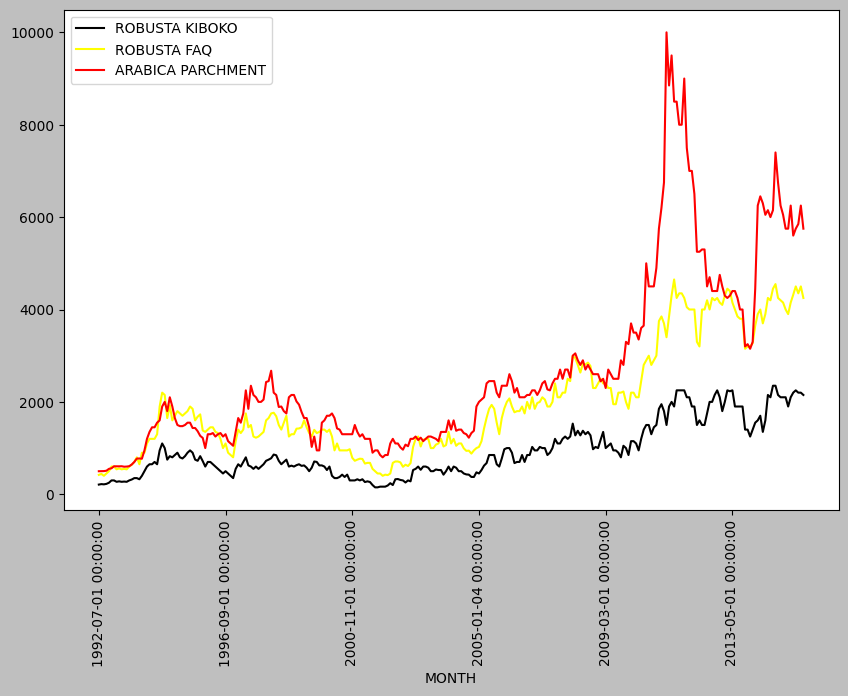

In [281]:
coffeePriceTrendsUGX.plot(
    rot=90,
    color=['black', 'yellow', 'red'],
    figsize=(10, 6.5),
);

# The USD graph may take the same shape: false

In [274]:
coffeePriceTrendsUSD = coffeePriceTrends['USD']

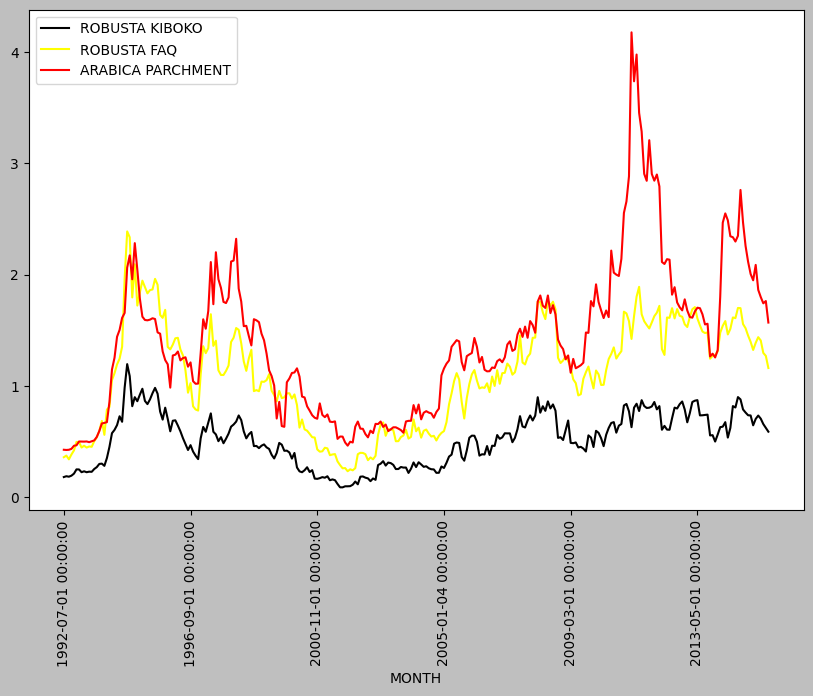

In [304]:
coffeePriceTrendsUSD.plot(
    figsize=(10, 6.5),
    color=['black', 'yellow', 'red'],
    rot=90,
);